In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, models, plot
from pathlib import Path
from skimage import exposure
import re

2022-12-14 10:22:25,685 [INFO] WRITING LOG OUTPUT TO C:\Users\teaguest\.cellpose\run.log


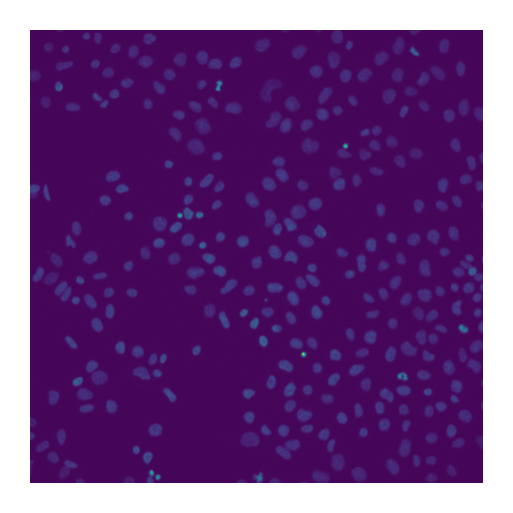

In [2]:
# get a list of files to segment
dataDir = Path(os.getcwd())

nucChannel = 0 #nuclear channel
files = []
for filename in Path(dataDir).rglob("*_MIP_p*_w%.4d.tif" % nucChannel):
    files.append(filename)
    #print(filename)

# view 1 image
img = io.imread(files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
img.ndim

2

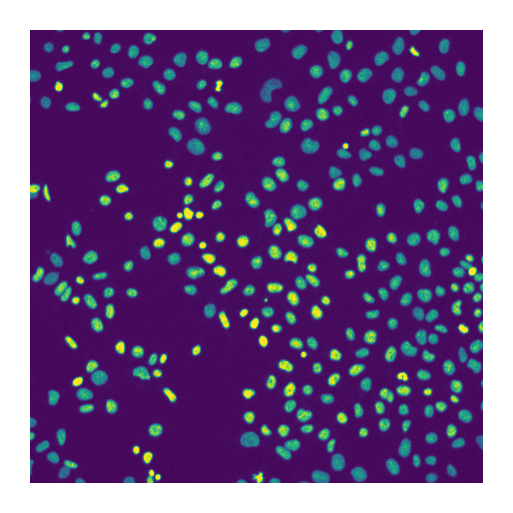

In [4]:
#display image with rescaled + saturated intensity
im = img[:,:]
p1, p99 = np.percentile(im, (1, 99))
J = exposure.rescale_intensity(im, in_range=(p1, p99))

plt.figure(figsize=(2,2))
plt.imshow(J)
plt.axis('off')
plt.show()

In [7]:
#run the model once
#if you set diameter=None in the call to model.eval, it will run the model once to estimate the size of nuclei and run again
#to do actual segmentation but this is slow and works less well on the micropattern than on sparser disordered cells
#I generally estimate in Fiji instead; for 40x, nuclear diameter generally ranges from ~25-70 pixels
model = models.Cellpose(gpu=True, model_type='nuclei')
chan = [0,0] #use chan = [0,0] for nuclear segmentation only
im = img
p1, p99 = np.percentile(im, (1, 99))
J = exposure.rescale_intensity(im, in_range=(p1, p99))
masks, flows, styles, diams = model.eval(J, diameter=17, channels=chan, net_avg=True)

2022-12-14 10:22:55,597 [INFO] ** TORCH CUDA version installed and working. **
2022-12-14 10:22:55,597 [INFO] >>>> using GPU
2022-12-14 10:22:55,757 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:22:58,649 [INFO] >>>> TOTAL TIME 2.89 sec


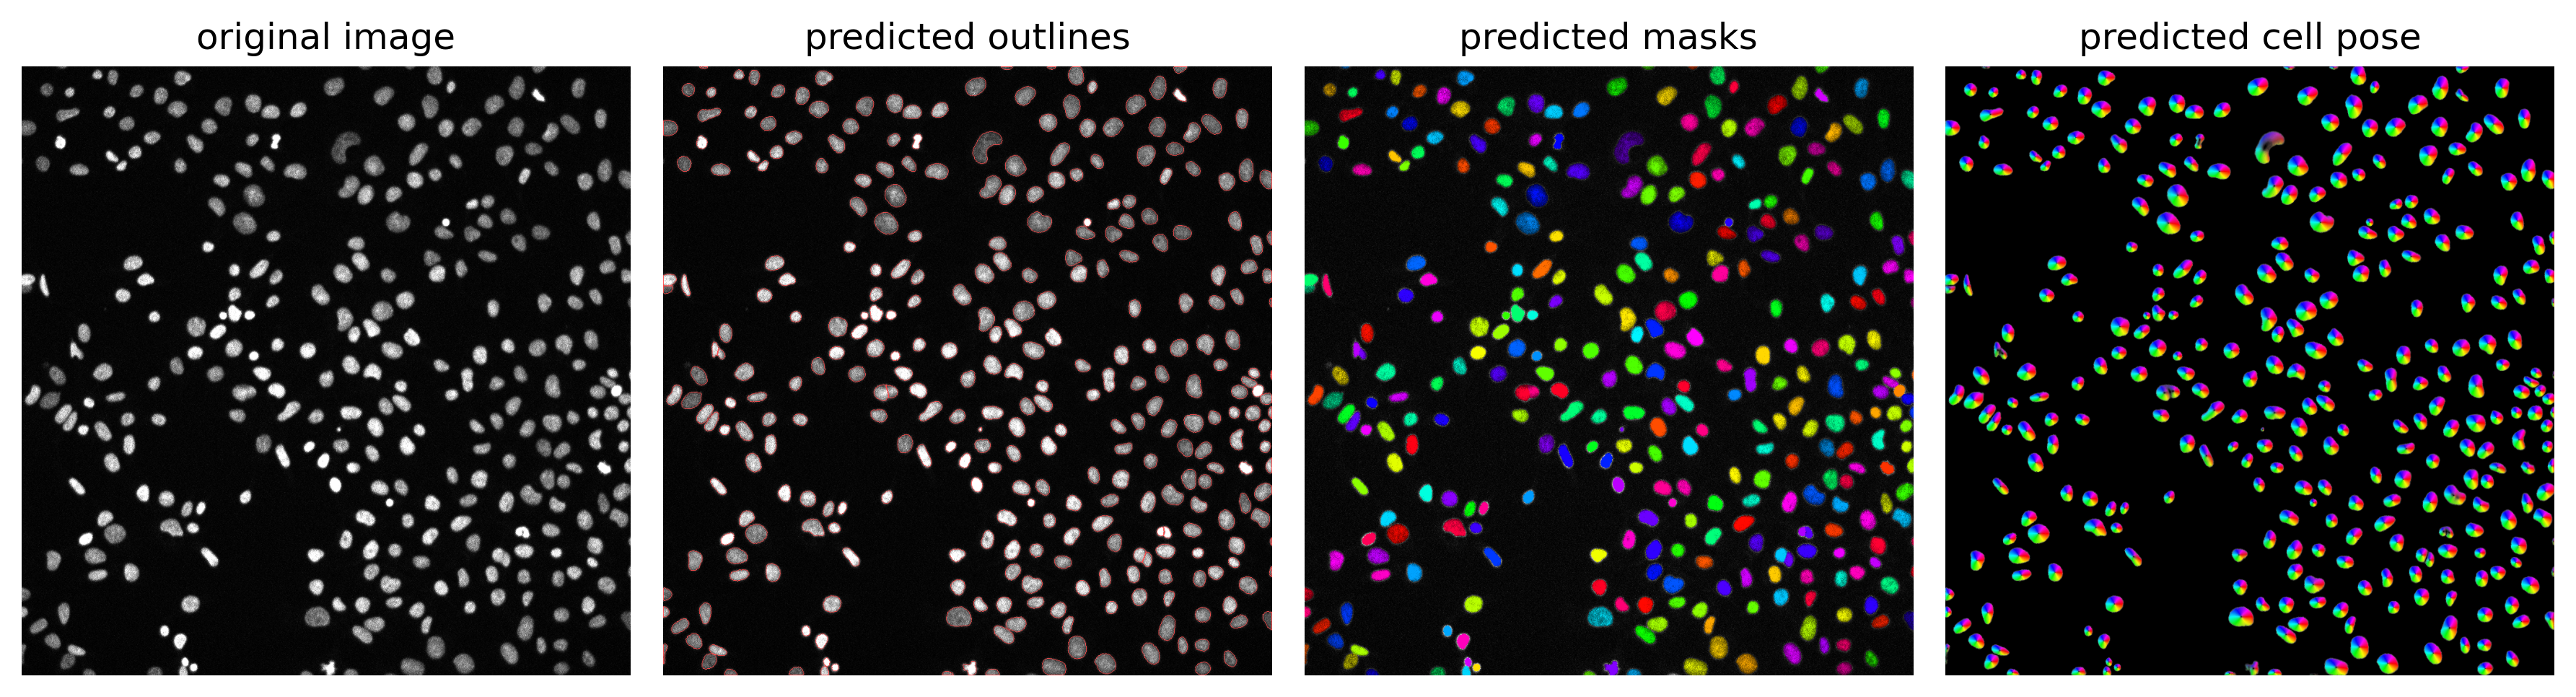

In [8]:
# DISPLAY RESULTS
#The built-in way of doing this is extremely slow, I've been saving results and visualizing in matlab instead
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, J, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [9]:
# RUN CELLPOSE

#from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='nuclei')
chan = [0,0]

#base = os.path.splitext(filename)[0]

# or in a loop
#for chan, filename in zip(channels, files):
for filename in files:
    base = os.path.splitext(filename)[0]
    print(base)
    img = io.imread(filename)
    p1, p99 = np.percentile(img, (1, 99))
    J = exposure.rescale_intensity(img, in_range=(p1, p99))
    masks, flows, styles, diams = model.eval(J, diameter=17, channels=chan, net_avg=True)
    # save results as png
    masks = masks.astype(np.uint16) if masks.max()<2**16-1 else masks.astype(np.uint32)
    io.imsave(base + '_cp_masks.png', masks)


2022-12-14 10:23:17,965 [INFO] ** TORCH CUDA version installed and working. **
2022-12-14 10:23:17,966 [INFO] >>>> using GPU
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0007_w0000
2022-12-14 10:23:18,243 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:23:20,956 [INFO] >>>> TOTAL TIME 2.71 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_12hr_r1_MIP_p0034_w0000
2022-12-14 10:23:21,219 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:23:23,375 [INFO] >>>> TOTAL TIME 2.16 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0019_w0000
2022-12-14 10:23:23,599 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:23:26,820 [INFO] >>>> TOTAL TIME 3.22 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeS

2022-12-14 10:24:52,702 [INFO] >>>> TOTAL TIME 3.41 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_12hr_r1_MIP_p0010_w0000
2022-12-14 10:24:52,968 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:24:55,528 [INFO] >>>> TOTAL TIME 2.56 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_48hr_r1_MIP_p0000_w0000
2022-12-14 10:24:55,794 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:24:58,526 [INFO] >>>> TOTAL TIME 2.73 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0003_w0000
2022-12-14 10:24:58,761 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:25:01,615 [INFO] >>>> TOTAL TIME 2.85 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0000_w0000
2022-12-14 10:25:01,850 [INFO] ~~~ FI

2022-12-14 10:26:31,719 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:26:34,798 [INFO] >>>> TOTAL TIME 3.08 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0030_w0000
2022-12-14 10:26:35,080 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:26:37,470 [INFO] >>>> TOTAL TIME 2.39 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0017_w0000
2022-12-14 10:26:37,689 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:26:40,998 [INFO] >>>> TOTAL TIME 3.31 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0025_w0000
2022-12-14 10:26:41,202 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:26:44,054 [INFO] >>>> TOTAL TIME 2.85 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_00hr_r1_

Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0024_w0000
2022-12-14 10:28:15,562 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:28:18,963 [INFO] >>>> TOTAL TIME 3.40 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_48hr_r1_MIP_p0016_w0000
2022-12-14 10:28:19,244 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:28:22,806 [INFO] >>>> TOTAL TIME 3.56 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0022_w0000
2022-12-14 10:28:23,087 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:28:26,438 [INFO] >>>> TOTAL TIME 3.35 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0002_w0000
2022-12-14 10:28:26,688 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:28:29,415 [INFO] >>>> TOTA

2022-12-14 10:29:54,663 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:29:57,408 [INFO] >>>> TOTAL TIME 2.75 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_12hr_r1_MIP_p0023_w0000
2022-12-14 10:29:57,606 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:30:00,079 [INFO] >>>> TOTAL TIME 2.47 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_06hr_r1_MIP_p0009_w0000
2022-12-14 10:30:00,338 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:30:02,536 [INFO] >>>> TOTAL TIME 2.20 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0003_w0000
2022-12-14 10:30:02,734 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:30:05,676 [INFO] >>>> TOTAL TIME 2.94 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_

Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_36hr_r1_MIP_p0031_w0000
2022-12-14 10:31:37,821 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:31:40,882 [INFO] >>>> TOTAL TIME 3.06 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0024_w0000
2022-12-14 10:31:41,100 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:31:43,809 [INFO] >>>> TOTAL TIME 2.71 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_24hr_r1_MIP_p0027_w0000
2022-12-14 10:31:44,059 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:31:46,462 [INFO] >>>> TOTAL TIME 2.40 sec
Z:\Heemskerk_Lab\Seth-06\221209_Smad4GFP_timeSeriesIF\fixed_round1\MIP\221213_Smad4GFP_DAPI_ISL1_SOX2_NANOG_timeSeriesIF_12hr_r1_MIP_p0005_w0000
2022-12-14 10:31:46,665 [INFO] ~~~ FINDING MASKS ~~~
2022-12-14 10:31:48,970 [INFO] >>>> TOTA

In [3]:
base = os.path.splitext(filename)[0]
for ci in range(0,2):
    print(ci)
    for zi in range(0,nzslices):
        print(base + '_z000' + str(zi) + '_cp_masks.png')


0
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0000_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0001_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0002_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0003_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0004_cp_masks.png
1
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0000_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0001_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0002_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0003_cp_masks.png
Y:\Seth\210801_Smad4GFP_BMP_IWP2_live\Fixed\stitched_p0001_w0000_t0000_z0004_cp_masks.png


In [20]:
model = models.Cellpose(gpu=True, model_type='nuclei')

2021-09-20 11:32:31,329 [INFO] ** TORCH CUDA version installed and working. **
2021-09-20 11:32:31,330 [INFO] >>>> using GPU


In [21]:
chan = [0,0]
p1, p99 = np.percentile(img, (1, 99))
J = exposure.rescale_intensity(img, in_range=(p1, p99))
masks, flows, styles, diams = model.eval(J, channels=chan, z_axis=0, diameter=35, do_3D=True, anisotropy=8, net_avg=True, min_size=15)


2021-09-20 11:32:59,079 [INFO] ~~~ FINDING MASKS ~~~
2021-09-20 11:32:59,080 [INFO] multi-stack tiff read in as having 5 planes 1 channels
2021-09-20 11:33:00,906 [INFO] running YX: 5 planes of size (3635, 3635)
2021-09-20 11:33:15,766 [INFO] 100%|##########| 5/5 [00:03<00:00,  1.43it/s]
2021-09-20 11:33:17,366 [INFO] running ZY: 3635 planes of size (5, 3635)
2021-09-20 11:33:27,940 [INFO] 18%|#7        | 214/1212 [00:09<00:43, 22.88it/s]


2021-09-20 11:33:41,618 [INFO] 43%|####2     | 520/1212 [00:23<00:29, 23.34it/s]


2021-09-20 11:33:55,283 [INFO] 68%|######8   | 826/1212 [00:37<00:17, 22.65it/s]


2021-09-20 11:34:08,755 [INFO] 93%|#########3| 1129/1212 [00:50<00:03, 22.43it/s]


2021-09-20 11:34:23,321 [INFO] 18%|#8        | 219/1212 [00:09<00:43, 22.93it/s]


2021-09-20 11:34:36,811 [INFO] 43%|####3     | 525/1212 [00:23<00:30, 22.44it/s]


2021-09-20 11:34:50,369 [INFO] 69%|######8   | 831/1212 [00:36<00:16, 22.50it/s]


2021-09-20 11:35:03,692 [INFO] 94%|#########3| 1134/1212 [00:50<00:03, 23.26it/s]


2021-09-20 11:35:18,359 [INFO] 18%|#8        | 220/1212 [00:09<00:43, 22.73it/s]


2021-09-20 11:35:31,950 [INFO] 43%|####3     | 526/1212 [00:23<00:30, 22.53it/s]


2021-09-20 11:35:45,525 [INFO] 69%|######8   | 832/1212 [00:36<00:16, 22.45it/s]


2021-09-20 11:35:58,919 [INFO] 94%|#########3| 1135/1212 [00:50<00:03, 23.01it/s]


2021-09-20 11:36:13,832 [INFO] 19%|#8        | 225/1212 [00:09<00:43, 22.48it/s]


2021-09-20 11:36:27,261 [INFO] 44%|####3     | 531/1212 [00:23<00:29, 23.27it/s]


2021-09-20 11:36:41,027 [INFO] 69%|######9   | 837/1212 [00:37<00:16, 22.53it/s]


2021-09-20 11:36:54,664 [INFO] 94%|#########4| 1140/1212 [00:50<00:03, 22.23it/s]


2021-09-20 11:36:57,913 [INFO] 100%|##########| 1212/1212 [00:54<00:00, 22.43it/s]
2021-09-20 11:37:03,394 [INFO] running ZX: 3635 planes of size (5, 3635)
2021-09-20 11:37:14,147 [INFO] 18%|#8        | 224/1212 [00:09<00:43, 22.57it/s]


2021-09-20 11:37:27,626 [INFO] 44%|####3     | 530/1212 [00:23<00:30, 22.42it/s]


2021-09-20 11:37:41,093 [INFO] 69%|######8   | 836/1212 [00:36<00:16, 23.29it/s]


2021-09-20 11:37:54,426 [INFO] 94%|#########3| 1139/1212 [00:50<00:03, 23.31it/s]


2021-09-20 11:38:08,688 [INFO] 19%|#8        | 228/1212 [00:10<00:45, 21.68it/s]


2021-09-20 11:38:22,155 [INFO] 44%|####4     | 534/1212 [00:23<00:29, 23.09it/s]


2021-09-20 11:38:35,731 [INFO] 69%|######9   | 840/1212 [00:37<00:15, 23.41it/s]


2021-09-20 11:38:49,125 [INFO] 94%|#########4| 1143/1212 [00:50<00:03, 22.77it/s]


2021-09-20 11:39:03,933 [INFO] 19%|#9        | 231/1212 [00:10<00:45, 21.33it/s]


2021-09-20 11:39:17,504 [INFO] 44%|####4     | 537/1212 [00:23<00:29, 22.62it/s]


2021-09-20 11:39:31,032 [INFO] 70%|######9   | 843/1212 [00:37<00:16, 22.43it/s]


2021-09-20 11:39:44,669 [INFO] 95%|#########4| 1146/1212 [00:50<00:02, 23.32it/s]


2021-09-20 11:39:59,620 [INFO] 19%|#9        | 234/1212 [00:10<00:43, 22.34it/s]


2021-09-20 11:40:13,109 [INFO] 45%|####4     | 540/1212 [00:23<00:29, 22.45it/s]


2021-09-20 11:40:26,683 [INFO] 70%|######9   | 846/1212 [00:37<00:15, 23.47it/s]


2021-09-20 11:40:40,149 [INFO] 95%|#########4| 1149/1212 [00:50<00:02, 22.42it/s]


2021-09-20 11:40:42,920 [INFO] 100%|##########| 1212/1212 [00:53<00:00, 22.60it/s]
2021-09-20 11:40:49,709 [INFO] network run in 470.33s
2021-09-20 11:42:34,119 [INFO] masks created in 104.41s
2021-09-20 11:42:41,087 [INFO] >>>> TOTAL TIME 582.01 sec


In [22]:
filename = files[0]
base = os.path.splitext(filename)[0]
masks = masks.astype(np.uint16) if masks.max()<2**16-1 else masks.astype(np.uint32)
io.imsave(base + '_rescaled_multiZ_cp_masks.tif', masks)

In [18]:
base + '_multiZ_cp_masks.png'

'Y:\\Seth\\210827_Smad4GFP_BMP_IWP2_live\\fixed\\stitched_p0000_w0000_t0000_multiZ_cp_masks.png'